Analyzing a dataset about the westbound traffic on the I-94 Interstate highway.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
print(traffic.head(5))
print(traffic.tail(5))
print(traffic['weather_main'].unique())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


No handles with labels found to put in legend.


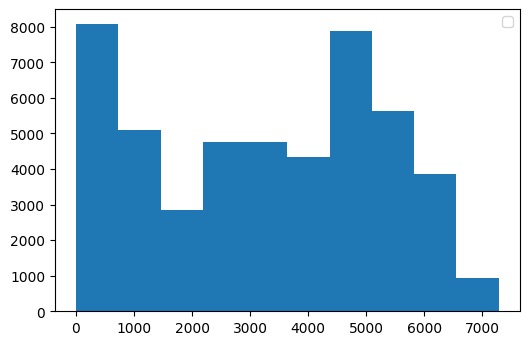

In [14]:
plt.hist(traffic['traffic_volume'])
plt.show()

In [13]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Transforming date_time, and divide by day and night


In [20]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [21]:
print(type(traffic['date_time']))

<class 'pandas.core.series.Series'>


In [29]:
# Extract the hour from the 'date_time' column
traffic['hour'] = traffic['date_time'].dt.hour

# Define daytime and nighttime hours (assuming daytime is from 7 AM to 7 PM)
daytime_hours = range(7, 19)  # 7 AM to 7 PM
nighttime_hours = list(range(19, 24)) + list(range(0, 7))  # 7 PM to 7 AM

# Isolate daytime data
daytime_data = traffic[traffic['hour'].isin(daytime_hours)]

# Isolate nighttime data
nighttime_data = traffic[traffic['hour'].isin(nighttime_hours)]

# Print the isolated data
print("Daytime Data:")
print(daytime_data)
print("\nNighttime Data:")
print(nighttime_data)

Daytime Data:
      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  hour  
0             scattered clouds 2012-10-02 09:00:00            5545     9  
1                br

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64


Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart.

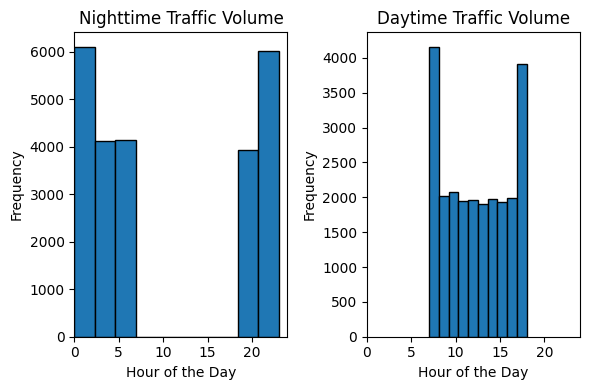

In [36]:
# Nighttime traffic volume
plt.subplot(1, 2, 1)
plt.hist(nighttime_data['hour'], edgecolor='black')
plt.title("Nighttime Traffic Volume")
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xlim([0, 24])

# Daytime traffic volume
plt.subplot(1, 2, 2)
plt.hist(daytime_data['hour'],  edgecolor='black')
plt.title("Daytime Traffic Volume")
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xlim([0, 24])

plt.tight_layout()
plt.show()

Group by month

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  hour  month  
0    scattered clouds 2012-10-02 09:00:00            5545     9     10  
1       broken clouds 2012-10-02 10:00:00            4516    10     10  
2     overcast clouds 2012-10-02 11:00:00            4767    11     10  
3     overcast clouds 2012-10-02 12:00:00            5026    12 

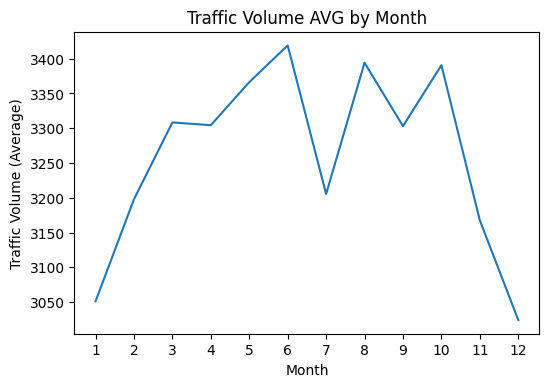

In [50]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
print(by_month['traffic_volume'])
print(traffic.head(5))

print(type(by_month))

plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume AVG by Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume (Average)')
plt.xticks(range(1, 13))
plt.show()

Group by day

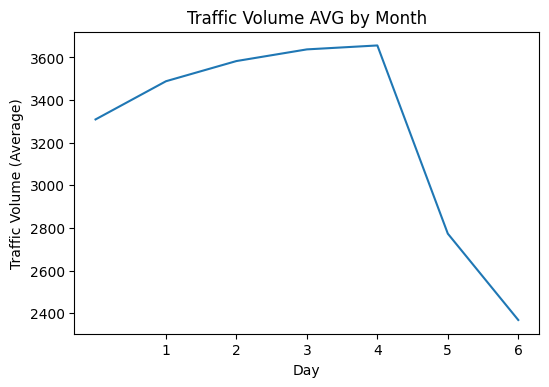

In [53]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic Volume AVG by DOW')
plt.xlabel('Day')
plt.ylabel('Traffic Volume (Average)')
plt.xticks(range(1, 7))
plt.show()

In [55]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['dayofweek'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


Plot grid chart for businnes days and other 

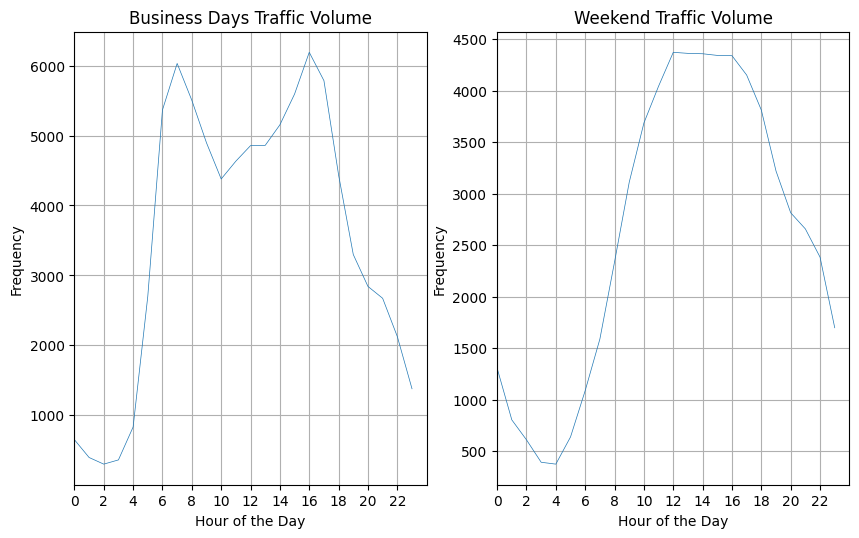

In [68]:
plt.figure(figsize=(10, 6))

# Business days traffic volume
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'], linewidth=0.5)
plt.title("Business Days Traffic Volume")
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24, 2))  # Show ticks every 2 units on the x-axis
plt.xlim([0, 24])
plt.grid(True)

# Other days traffic volume
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'], linewidth=0.5)
plt.title("Weekend Traffic Volume")
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24, 2))  # Show ticks every 2 units on the x-axis
plt.xlim([0, 24])

plt.grid(True)
plt.show()

Conclusions:
1. On business days we have the highest avg traffic betwen 8 and 10 am and then about 4 pm. This is propably connectwed with working hours.

2. On the weekend avg traffic increase from 4 am, but the highest is between 12 and 4 pm. On weekends we are sleeping longer, and we go to a shop or for a trip a bit later.

In [74]:
# Calculate correlation of traffic_volume with all other numeric columns
correlation_matrix = traffic.corr()['traffic_volume']
print(correlation_matrix)

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
hour              0.352401
month            -0.002533
dayofweek        -0.149544
Name: traffic_volume, dtype: float64


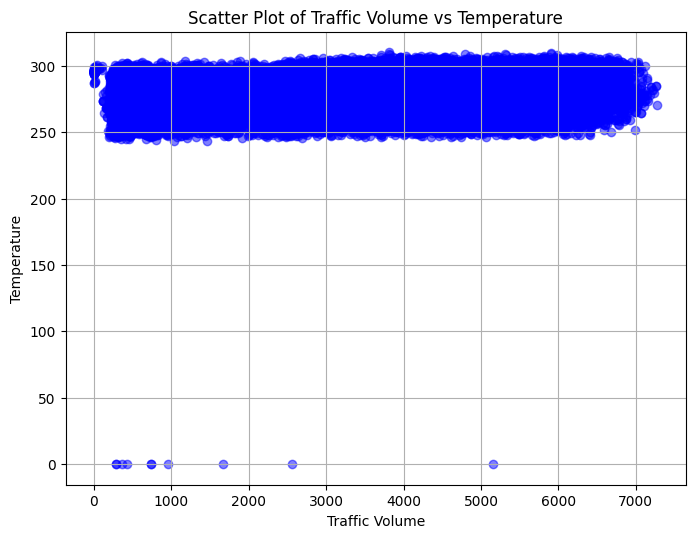

In [79]:
##The highest correlation from weather incicators is with temp: 
#Print scatter plot with traffic_volume and temp column

plt.figure(figsize=(8, 6))
plt.scatter(traffic['traffic_volume'], traffic['temp'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Traffic Volume vs Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

There are no any reliable conslusion from this plot

In [86]:
## Calculate the average traffic volume associated with each unique value 
## in weather_main and weather_description


by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()
print(by_weather_main)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         281.489971  0.000000  0.000000    1.546710     3055.908819   
Clouds        281.466101  0.000000  0.000000   64.056120     3618.449749   
Drizzle       283.795431  0.157512  0.000000   82.319605     3290.727073   
Fog           279.415713  0.087007  0.000625   51.497807     2703.720395   
Haze          275.818581  0.046868  0.000000   58.670588     3502.101471   
Mist          279.476892  0.238336  0.000728   65.956303     2932.956639   
Rain          286.979586  2.281056  0.000187   72.599788     3317.905501   
Smoke         290.927500  0.527000  0.000000   53.350000     3237.650000   
Snow          267.955188  0.025223  0.001655   81.465229     3016.844228   
Squall        292.387500  3.482500  0.000000   76.000000     2061.750000   
Thunderstorm  292.716431  1.189246  0.000000   68.515474     3001.620890   

           

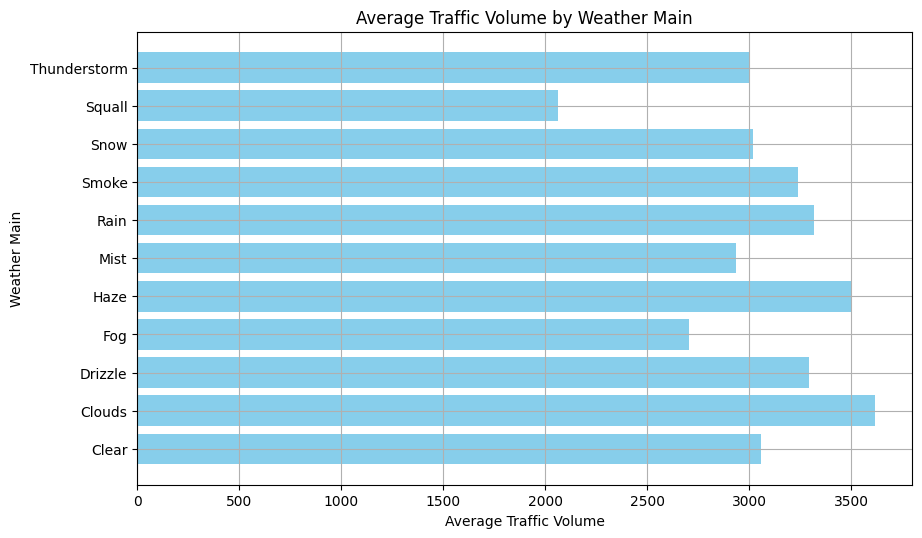

In [91]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_main
plt.figure(figsize=(10, 6))
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'], color='skyblue')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Main')
plt.title('Average Traffic Volume by Weather Main')
plt.grid(True)
plt.show()

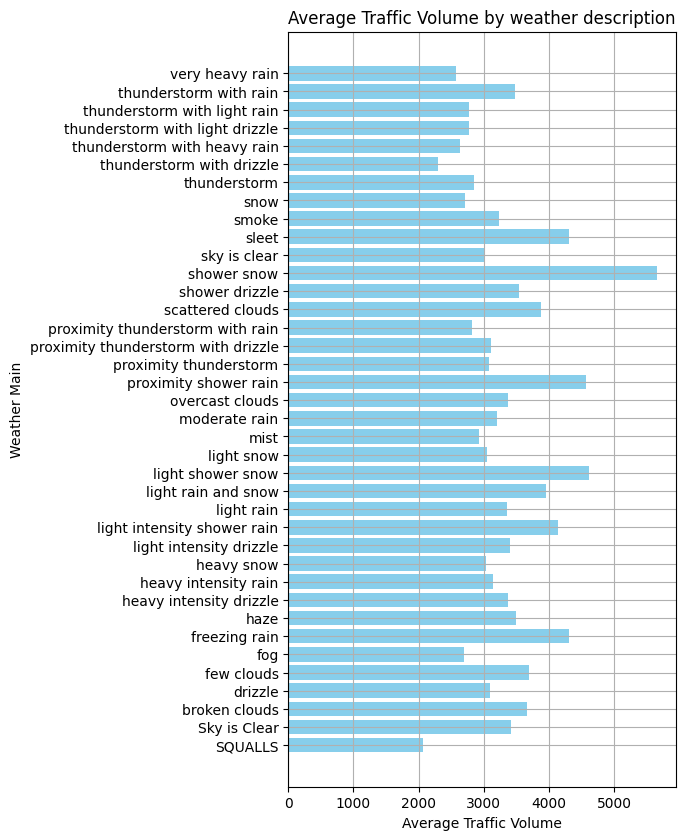

In [97]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_description
plt.figure(figsize=(5, 10))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'], color='skyblue')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Main')
plt.title('Average Traffic Volume by weather description')
plt.grid(True)
plt.show()

Impact of Weather on Traffic Volume:

    Clear weather has the highest average traffic volume, indicating that generally, clearer weather conditions might encourage more people to travel.
    Clouds and Rain follow with relatively high average traffic volumes, suggesting that these weather conditions still permit substantial travel.
    Snow and Fog have lower average traffic volumes, likely due to the more challenging driving conditions they present.

Traffic Behavior During Extreme Conditions:

    Thunderstorm and Squall conditions show significantly lower average traffic volumes. This indicates that people tend to avoid travel during severe weather events, prioritizing safety.

Influence of Weather Variables:

    Temperature (temp) might play a role in traffic volume, although the correlation and impact weren't explicitly shown in the provided analysis.
    Rainfall (rain_1h) and Snowfall (snow_1h), while included in the dataset, didn't show a direct correlation with traffic volume in the provided analysis but could be explored further.

Visualization Insights:

    The horizontal bar plot effectively showcases the varying average traffic volumes across different weather conditions.
    Clear labels and titles help interpret the data easily, making it clear which weather conditions correlate with higher or lower traffic volumes.